# 2.1 Exercise - 1:

## 1. Read and display the image.
• Read the image using the Pillow library and display it

• You can also use matplotlib to display the image..

In [100]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def display_pil(array):
    image = Image.fromarray(array)
    image.show()

def display_plt(array, color):
    plt.imshow(array, cmap=color)
    plt.show()

In [102]:
image = Image.open("Lenna_(test_image).png")

In [103]:
image.show()

## 2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

In [104]:
image_array = np.array(image)
print(image_array)

[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


In [105]:
image2 = image_array[:100, :100]

In [106]:
display_pil(image2)

## 3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

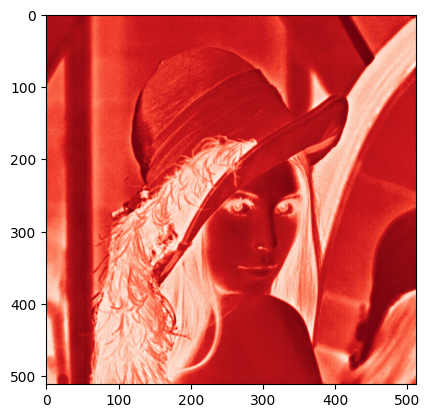

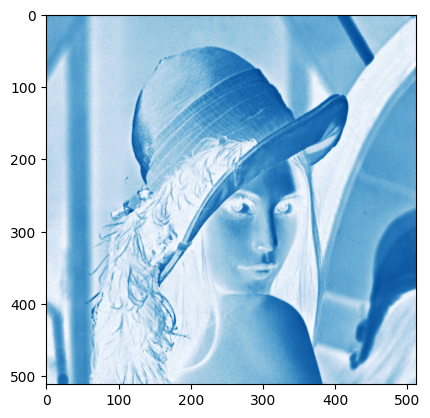

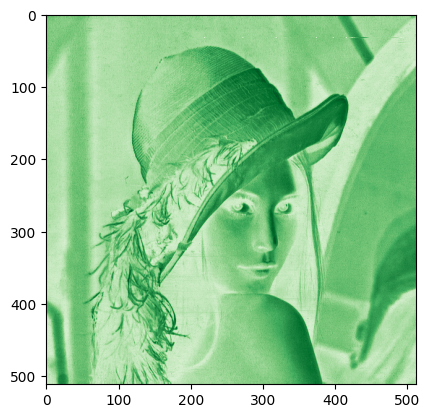

In [107]:
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

display_plt(red_channel, "Reds")
display_plt(green_channel, "Blues")
display_plt(blue_channel, "Greens")

## 4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

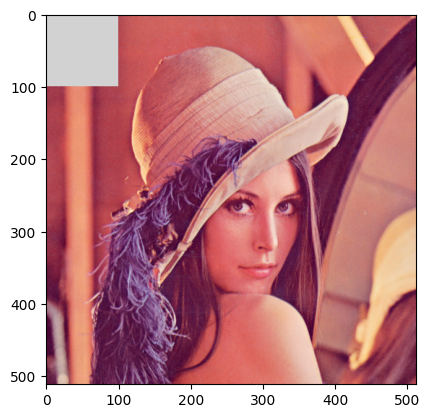

In [108]:
image_array[:100, :100] = 210

display_plt(image_array, None)

# 2.2 Exercise - 2:
Complete all the Tasklib.

## 1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

In [109]:
image = Image.open("cameraman.png")
image_grayscale = image.convert('L')
image_grayscale.show()

## 2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

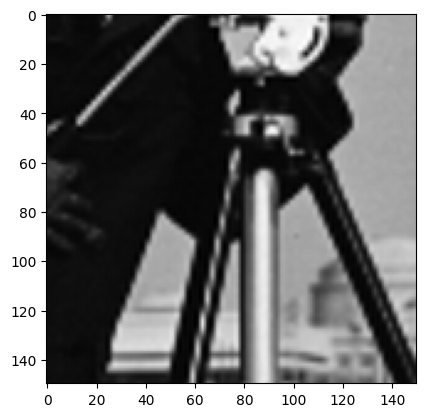

In [110]:
image_array = np.array(image_grayscale)

h, w = image_array.shape[:2]

center_x, center_y = w // 2, h // 2

pixel_section = 150
half_section = pixel_section // 2

cropped = image_array[center_y - half_section:center_y + half_section, center_x - half_section:center_x + half_section]

display_plt(cropped, "gray")

## 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image
).
• Display the resulting binary image.

In [111]:
threshold = 100

image_file = image.point(lambda p: 255 if p > threshold else 0)
image_file.show()

## 4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.

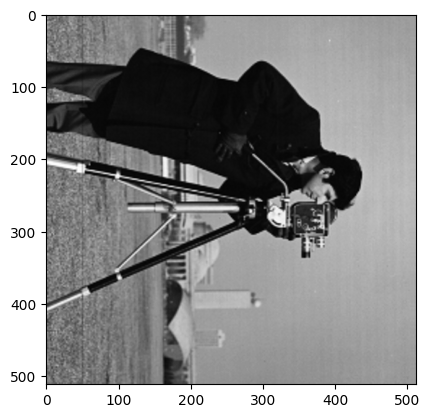

In [112]:
rotate_image = image.rotate(270)
rotate_image_array = np.array(rotate_image)
display_plt(rotate_image, "gray")

## 5. Convert the grayscale image to an RGB image.
• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.

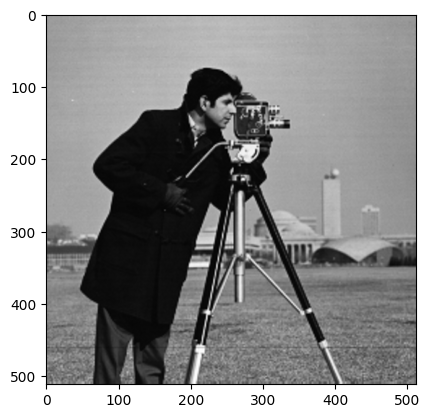

In [113]:
image_grayscale_array = np.array(image_grayscale)

rgb = np.stack([image_grayscale_array] * 3, axis=-1)

display_plt(rgb, None)

# 3 Image Compression and Decompression using PCA.
In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.

## 1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.

In [114]:
image = Image.open("cameraman.png")
image_array = np.array(image)
height, width = image_array.shape
data = image_array.reshape(height, width)

mean = np.mean(data, axis=0)
centered_data = data - mean

covariance = np.cov(centered_data, rowvar=False)

## 2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.ta.

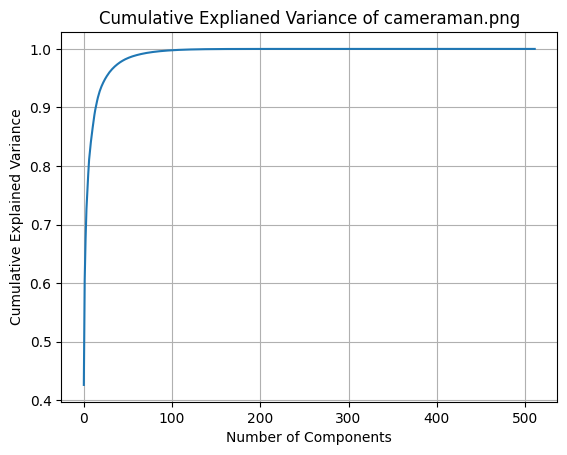

In [115]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

explained_variances_ratio = eigenvalues / np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variances_ratio))
plt.title("Cumulative Explianed Variance of cameraman.png")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

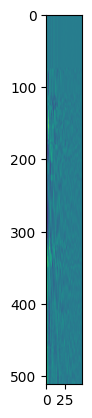

In [116]:
def pca(k):
    components = eigenvectors[:, :k]
    
    compressed_data = np.dot(centered_data, components)
    return components, compressed_data


components, compressed_data = pca(50)

plt.imshow(compressed_data)
plt.show()

## 3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representativaluate.

In [117]:
def reconstruct(compressed_data, components):
    decompressed_data = np.dot(compressed_data, components.T) + mean
    return decompressed_data


decompressed_data = reconstruct(compressed_data, components)
display_pil(decompressed_data)

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result. • Display the Results and Evaluate.

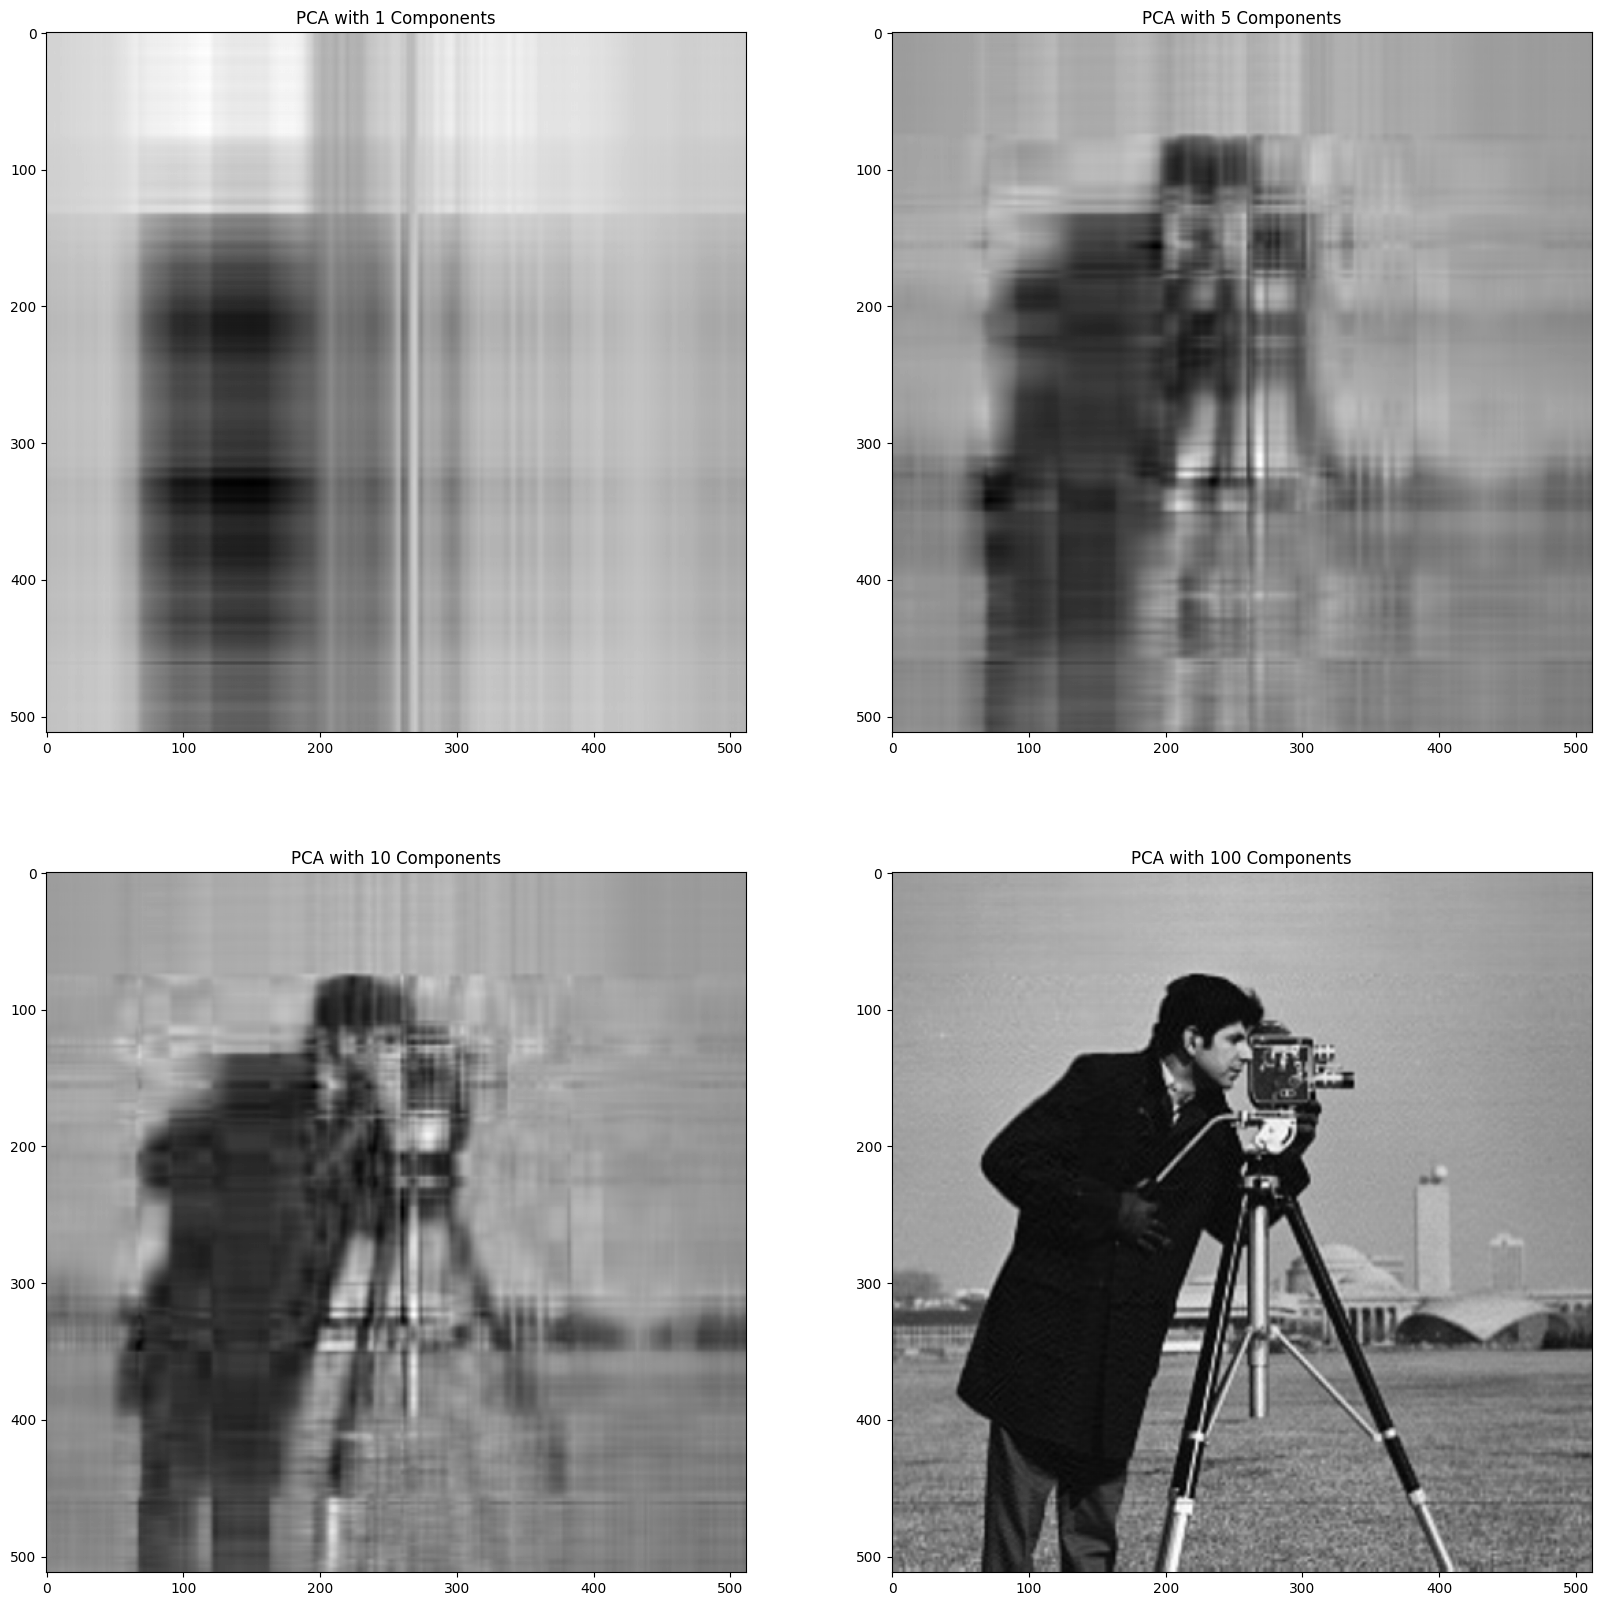

In [118]:
k_values = [1, 5, 10, 100]

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

for index in range(4):
    i, j = index // 2, index % 2

    k_value = k_values[index]

    components, compressed_data = pca(k_value)
    decompressed_data = reconstruct(compressed_data, components)
    axs[i, j].imshow(decompressed_data, cmap="gray")
    axs[i, j].set_title(f"PCA with {k_value} Components")


plt.show()